# Diagnosing bias and variance problems with learning/validation curves

In [1]:
# regular import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('bmh')
plt.rcParams['font.size'] = 11

### Data Loading and Train Test Split

In [3]:
# Loading the brest cancer data
data_uri = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(data_uri, header=None)

In [4]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
# Seperating the featu
features = df.loc[:, 2:].values
targets = df.loc[:, 1].values

In [7]:
le = LabelEncoder()
targets = le.fit_transform(targets)
le.classes_

array(['B', 'M'], dtype=object)

In [8]:
le.transform(["M", "B"])

array([1, 0])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Train Test split
feat_train, feat_test, tar_train, tar_test = train_test_split(
    features, 
    targets, 
    test_size=0.2, 
    stratify=targets, 
    random_state=1
)

### Building Pipeline

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

#### A. Diagnosis with Learning Curve

In [21]:
pipe_lr = make_pipeline(
    StandardScaler(), 
    LogisticRegression(penalty='l2',random_state=1, solver='liblinear')
)

In [22]:
train_sizes, train_scores, test_scores = (
    learning_curve(
        estimator=pipe_lr,
        X=feat_train,
        y=tar_train,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=10,
        n_jobs=1
    )
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

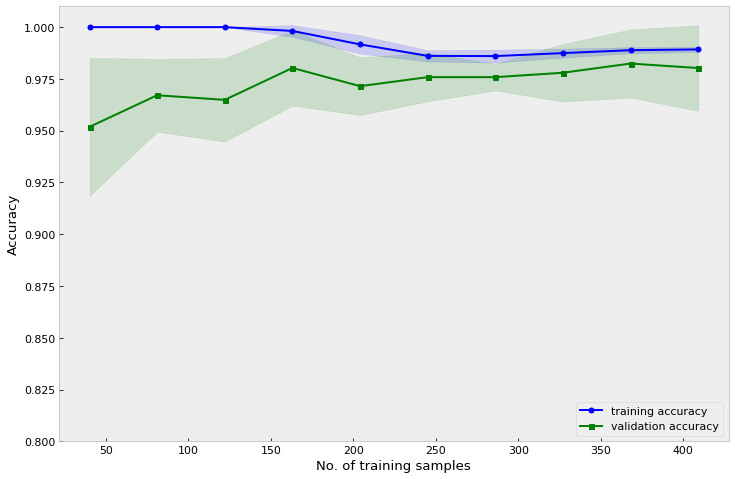

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')

plt.fill_between(
    train_sizes, 
    train_mean + train_std, 
    train_mean - train_std, 
    alpha=0.15, color='blue'
)

plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(
    train_sizes, 
    test_mean + test_std, 
    test_mean - test_std, 
    alpha=0.15, color='green'
)

plt.grid()
plt.xlabel('No. of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.01])
plt.show()

_Note: As we can see in the preceding learning curve plot, our model performs quite well on both the training and validation dataset if it had seen more than 250 samples during training._

#### B. Underfitting/Overfitting via Vaildation Curves

In [15]:
from sklearn.model_selection import validation_curve

In [24]:

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(
    estimator=pipe_lr,
    X=feat_train,
    y=tar_train,
    param_name='logisticregression__C',
    param_range=param_range,
    cv=10
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [25]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

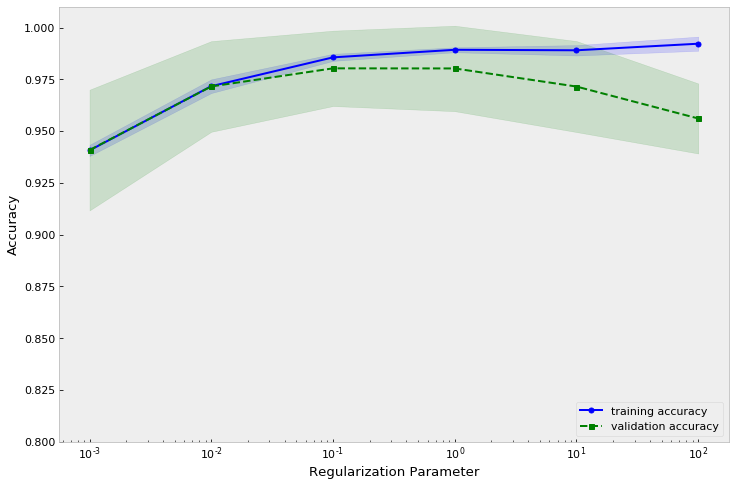

In [26]:
plt.figure(figsize=(12, 8))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')

plt.fill_between(
    param_range, 
    train_mean + train_std, 
    train_mean - train_std, 
    alpha=0.15, color='blue'
)

plt.plot(param_range, test_mean, color='green', marker='s', markersize=5, label='validation accuracy', linestyle='--')

plt.fill_between(
    param_range, 
    test_mean + test_std, 
    test_mean - test_std, 
    alpha=0.15, color='green'
)

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Regularization Parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.01])
plt.show()

*Note: Although the differences in the accuracy for varying values of C are subtle, we can see that the model slightly underfits the data when we increase the regularization strength (small values of C). However, for large values of C, it means lowering the strength of regularization, so the model tends to slightly overfit the data. In this case, the sweet spot appears to be between 0.01 and 0.1 of the C value.*

# References
[1] Python Machine Learning by Sebastian R.